<a href="https://colab.research.google.com/github/Praveenku32k/Brain_Tumor_Classification/blob/main/Brain_Tumor_Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Brain** Tumor **Classification**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd

In [3]:
os.listdir('/content/drive/MyDrive/11 Brain Tumor Classification/brain_tumor_dataset')

['no', 'yes']

In [4]:
enc = OneHotEncoder()
enc.fit([[0], [1]]) 
def names(number):
    if(number == 0):
        return 'Tumor'
    else:
        return 'Normal'

In [5]:
data = []
paths = []
ans = []
for r, d, f in os.walk(r'/content/drive/MyDrive/11 Brain Tumor Classification/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((128,128))
    x = np.array(x)
    if(x.shape == (128,128,3)):
        data.append(np.array(x))
        ans.append(enc.transform([[0]]).toarray())

In [6]:
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/11 Brain Tumor Classification/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((128,128))
    x = np.array(x)
    if(x.shape == (128,128,3)):
        data.append(np.array(x))
        ans.append(enc.transform([[1]]).toarray())

In [7]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [8]:
ans = np.array(ans)
ans = ans.reshape(139,2)

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='selu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='selu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='selu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [10]:
x_train,x_test,y_train,y_test = train_test_split(data, ans, test_size=0.2, shuffle=True, random_state=69)

In [11]:
history = model.fit(x_train, y_train, epochs=30, batch_size=40, verbose=1,validation_data=(x_test, y_test))

Epoch 1/30
3/3 [==============================] - 13s 4s/step - loss: 128.5273 - val_loss: 225.1382
Epoch 2/30
3/3 [==============================] - 12s 5s/step - loss: 22.4277 - val_loss: 48.7063
Epoch 3/30
3/3 [==============================] - 16s 5s/step - loss: 14.0553 - val_loss: 50.0387
Epoch 4/30
3/3 [==============================] - 11s 4s/step - loss: 8.2532 - val_loss: 58.8484
Epoch 5/30
3/3 [==============================] - 18s 5s/step - loss: 5.5786 - val_loss: 19.6651
Epoch 6/30
3/3 [==============================] - 10s 3s/step - loss: 4.0135 - val_loss: 7.1816
Epoch 7/30
3/3 [==============================] - 12s 4s/step - loss: 2.5094 - val_loss: 4.6955
Epoch 8/30
3/3 [==============================] - 12s 4s/step - loss: 0.8179 - val_loss: 6.1983
Epoch 9/30
3/3 [==============================] - 12s 4s/step - loss: 0.7374 - val_loss: 7.4642
Epoch 10/30
3/3 [==============================] - 11s 4s/step - loss: 0.8408 - val_loss: 6.3465
Epoch 11/30
3/3 [============

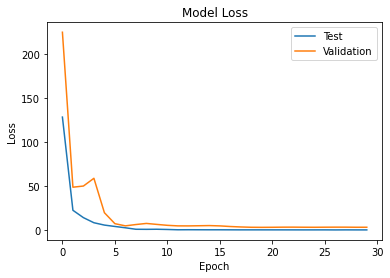

In [12]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

99.33806657791138% Confidence This Is Normal


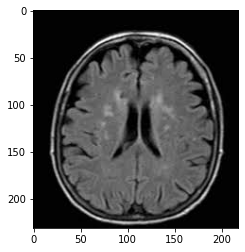

In [13]:
img = Image.open(r"/content/drive/MyDrive/11 Brain Tumor Classification/brain_tumor_dataset/no/17 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.95599389076233% Confidence This Is A Tumor


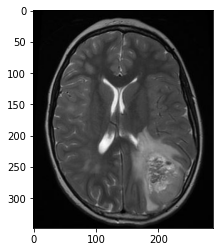

In [15]:
img = Image.open(r"/content/drive/MyDrive/11 Brain Tumor Classification/brain_tumor_dataset/yes/Y100.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is A ' + names(classification))